## Clustering

In [1]:
#There is no target, there is only data, we don't divide th data into x,y

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_excel('cars.xls')

In [4]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [5]:
with pd.ExcelWriter("arabadeneme.xlsx") as writer:
    df.to_excel(writer, sheet_name="Sheet1")  
    df.to_excel(writer, sheet_name="Sheet2")

In [6]:
from sklearn.cluster import KMeans
from sklearn .metrics import silhouette_score 

In [7]:
import matplotlib.pyplot as plt

In [8]:
x =df[['Price','Mileage','Cylinder']]

In [9]:
x.head()

,Price,Mileage,Cylinder
0,17314.103129,8221,6
1,17542.036083,9135,6
2,16218.847862,13196,6
3,16336.913140,16342,6
4,16339.170324,19832,6


In [10]:
model=KMeans(n_clusters=4) #divided into 4 groups

In [11]:
model=model.fit(x)

In [12]:
predict=model.predict(x)

In [13]:
predict

array([2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 3, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 0, 3, 0,
       0, 3, 0, 0, 2, 2, 2, 2, 3, 3, 3, 3, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3,
       1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,

In [14]:
x['cluster'] =predict;

In [15]:
x.head()

,Price,Mileage,Cylinder,cluster
0,17314.103129,8221,6,2
1,17542.036083,9135,6,2
2,16218.847862,13196,6,2
3,16336.913140,16342,6,2
4,16339.170324,19832,6,0


In [16]:
silhouette_score(x,predict)  
#we will decide how similar


0.41328610364684915

In [17]:
#Elbow Method:Wherever the elbow starts to break, you have to divide 
#it into as many groups.
#let's see if we did it right

In [18]:
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        model=model.fit(x)
        pred=model.predict(x)
        score=silhouette_score(x,pred)
        print ("Number of cluster{}, silhoette{}".format(no_of_cluster,score))

In [19]:
clust=x.assign(Cluster=model.labels_)
model.cluster_centers_.astype('int')
model.labels_

array([2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 3, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 0, 3, 0,
       0, 3, 0, 0, 2, 2, 2, 2, 3, 3, 3, 3, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3,
       1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


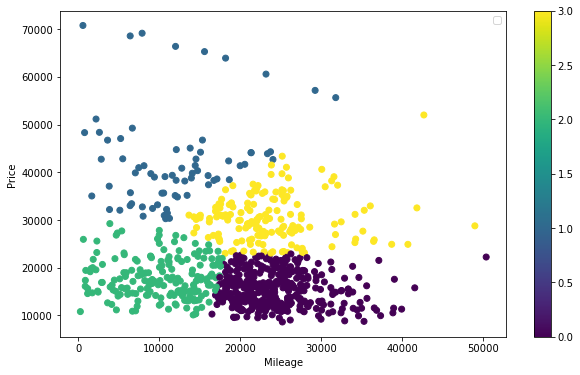

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(x.Mileage,x.Price,c=predict)
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.legend()
plt.colorbar()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


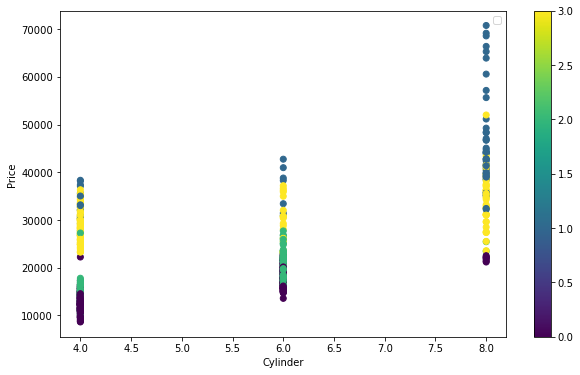

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(x.Cylinder,x.Price,c=predict)
plt.xlabel("Cylinder")
plt.ylabel("Price")
plt.legend()
plt.colorbar()
plt.show()

In [22]:
##Elbow Method: whenever the silhouette starts falling, from there
# makes sense to group

In [23]:
import numpy as np

In [24]:
# Predicticting the silhouette score for each clusters 
allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust (clusters): 
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters = no_of_cluster)
        model=model.fit(x)
        pred=model.fit_predict(x)
        sum_of_squared_distances.append(model.inertia_)
        score = silhouette_score(x,pred)
        print("Number of cluster {},silhouette{}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(9)

Number of cluster 2,silhouette0.45170118960594147
Number of cluster 3,silhouette0.41321086771955506
Number of cluster 4,silhouette0.41328610364684915
Number of cluster 5,silhouette0.3550640633663908
Number of cluster 6,silhouette0.36147210482531417
Number of cluster 7,silhouette0.3598539750048734
Number of cluster 8,silhouette0.3667827965849088
Number of cluster 9,silhouette0.34850293146114275


In [25]:
#It decreased in line 5 and increased after that, and since it started from 2
#actually we say th 4th,so we wrote 4. Because for grouping there must be at least 2 groups

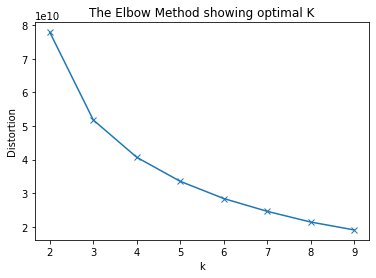

In [26]:
plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing optimal K')
plt.show() 

In [27]:
x

,Price,Mileage,Cylinder,cluster
0,17314.103129,8221,6,2
1,17542.036083,9135,6,2
2,16218.847862,13196,6,2
3,16336.913140,16342,6,2
4,16339.170324,19832,6,0
...,...,...,...,...
799,16507.070267,16229,6,2
800,16175.957604,19095,6,0
801,15731.132897,20484,6,0
802,15118.893228,25979,6,0


In [28]:
d={0:"Cheap and few miles",1:"Cheap and many miles",2:"Expensive and few miles",3:"Medium"}
x["name"]=x["cluster"].map(d);

In [31]:
x[['name','cluster']].sample(5)

,name,cluster
79,Cheap and few miles,0
730,Medium,3
196,Cheap and few miles,0
617,Cheap and few miles,0
758,Cheap and few miles,0
